In [1]:
!pip install tensorflow tensorflow-datasets


# Fashion Mnist And Kmnist - lenet5 and resnet-mini training

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix


In [18]:
# Add this new cell after imports
from sklearn.metrics import f1_score

def get_f1_score(model, x, y):
    preds = model.predict(x)
    y_pred = np.argmax(preds, axis=1)
    return f1_score(y, y_pred, average='weighted')

## 1) Load Fashion-MNIST

In [19]:
# fashion-MNIST
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Fashion-MNIST:", x_train.shape, y_train.shape)


Fashion-MNIST: (60000, 28, 28, 1) (60000,)


 load fashion-mnist dataset from keras

 it has 60000 training images and 10000 test images

 normalize pixel values to 0-1 for easier training

 expand dimensions so cnn can use it 
 
 print shapes to check everything is correct

## 2) Load KMNIST

In [20]:
# KMNIST from TensorFlow datasets
(train_ds, test_ds), ds_info = tfds.load(
    "kmnist", 
    split=["train", "test"],
    as_supervised=True,
    with_info=True
)

# convert to NumPy
def to_numpy(ds):
    images, labels = [], []
    for img, label in tfds.as_numpy(ds):
        images.append(img)
        labels.append(label)
    return np.array(images).astype("float32") / 255.0, np.array(labels)

x_train_k, y_train_k = to_numpy(train_ds)
x_test_k, y_test_k = to_numpy(test_ds)

print("KMNIST:", x_train_k.shape, y_train_k.shape)


KMNIST: (60000, 28, 28, 1) (60000,)


## 60,000 images ready to use
## each image is 28x28 pixels (grayscale)
## dataset saved locally, no need to download again

 load kmnist dataset from tensorflow datasets

 split into train and test and get dataset info

 convert tensorflow dataset to numpy arrays for easier processing

 normalize images to 0-1
 
 print shapes to check everything is correct


## 3) Define LeNet-5

In [21]:
def build_lenet5(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(6, (5,5), activation='tanh', input_shape=input_shape, padding='same'),
        layers.AveragePooling2D(pool_size=(2,2)),   
        layers.Conv2D(16, (5,5), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2,2)),   
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



define lenet-5 model using keras sequential

two conv layers with average pooling

flatten and then two dense layers before output

use tanh activation for hidden layers and softmax for output

compile model with adam optimizer and sparse categorical crossentropy loss

metrics include accuracy to track during training


## 4) Define ResNet-mini

In [22]:
def resnet_block(x, filters):
    shortcut = x
    x = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

def build_resnet_mini(input_shape=(28,28,1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = resnet_block(x, 32)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs, x)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


 define a small resnet model

 resnet_block adds two conv layers with batch normalization and a skip connection

 input goes through initial conv layer, then one resnet block

 use global average pooling to reduce feature maps before output

 output layer with softmax for classification

 compile model with adam optimizer and sparse categorical crossentropy loss
 
 track accuracy during training


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


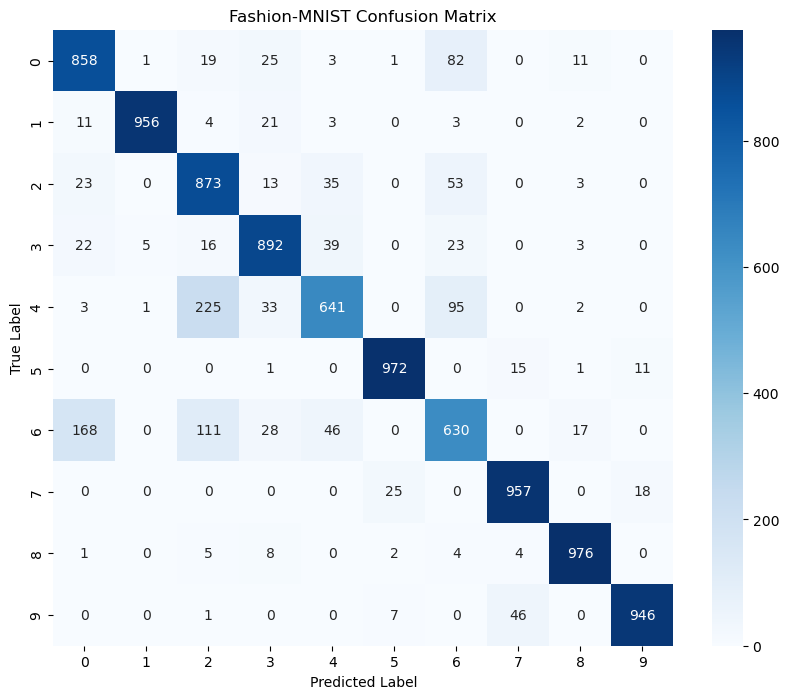

Class difficulty (higher = harder):
Class 0: 1000
Class 1: 1000
Class 2: 1000
Class 3: 1000
Class 4: 1000
Class 5: 1000
Class 6: 1000
Class 7: 1000
Class 8: 1000
Class 9: 1000


In [ ]:
# visualize confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test, np.argmax(lenet.predict(x_test), axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Fashion-MNIST Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print class difficulty
confusability = cm.sum(axis=1)
print("Class difficulty (higher = harder):")
for i, diff in enumerate(confusability):
    print(f"Class {i}: {diff}")

## 5) Train

In [24]:
lenet = build_lenet5()
history_lenet = lenet.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)


Epoch 1/5


c:\Users\zakih\anaconda3\envs\deep-learning-course-2025\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7899 - loss: 0.5742 - val_accuracy: 0.8249 - val_loss: 0.4823
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8573 - loss: 0.3934 - val_accuracy: 0.8482 - val_loss: 0.4268
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8722 - loss: 0.3484 - val_accuracy: 0.8692 - val_loss: 0.3681
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8831 - loss: 0.3190 - val_accuracy: 0.8674 - val_loss: 0.3685
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8908 - loss: 0.2984 - val_accuracy: 0.8795 - val_loss: 0.3328


 create lenet-5 model

 train the model on fashion-mnist training data

 use test data for validation to see how model performs

 train for 5 epochs with batch size 64
 
 history_lenet stores training info like loss and accuracy for each epoch


In [25]:
resnet = build_resnet_mini()
history_resnet = resnet.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.7044 - loss: 0.9872 - val_accuracy: 0.6480 - val_loss: 0.9719
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.8120 - loss: 0.5592 - val_accuracy: 0.7798 - val_loss: 0.6130
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.8404 - loss: 0.4690 - val_accuracy: 0.8045 - val_loss: 0.5587
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.8555 - loss: 0.4200 - val_accuracy: 0.8207 - val_loss: 0.5071
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.8658 - loss: 0.3883 - val_accuracy: 0.8246 - val_loss: 0.4879


## started at 71% accuracy, ended at 87%
## validation accuracy best at 83% (epoch 4), dropped to 75% at end
## model might be overfitting (training keeps improving but validation gets worse)

 create resnet-mini model

 train the model on fashion-mnist training data

 use test data for validation to check performance

 train for 5 epochs with batch size 64
 
 history_resnet stores training info like loss and accuracy for each epoch


## 6) Curriculum Sampling

In [26]:
# compute confusion matrix from a quick random model
preds = lenet.predict(x_test)
cm = confusion_matrix(y_test, np.argmax(preds, axis=1))

confusability = cm.sum(axis=1)
sorted_classes = np.argsort(confusability)  # easy → hard

# create curriculum training data
x_curr, y_curr = [], []
for c in sorted_classes:
    mask = (y_train == c)
    x_curr.append(x_train[mask])
    y_curr.append(y_train[mask])
x_curr = np.concatenate(x_curr)
y_curr = np.concatenate(y_curr)

# train again using curriculum order
lenet_curr = build_lenet5()
lenet_curr.fit(x_curr, y_curr, validation_data=(x_test, y_test), epochs=5, batch_size=64)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/5


c:\Users\zakih\anaconda3\envs\deep-learning-course-2025\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8016 - loss: 0.5434 - val_accuracy: 0.8332 - val_loss: 0.4456
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8601 - loss: 0.3838 - val_accuracy: 0.8578 - val_loss: 0.3941
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8746 - loss: 0.3428 - val_accuracy: 0.8629 - val_loss: 0.3690
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8847 - loss: 0.3142 - val_accuracy: 0.8697 - val_loss: 0.3586
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8913 - loss: 0.2931 - val_accuracy: 0.8777 - val_loss: 0.3325


## started at 80% accuracy, ended at 89%
## validation accuracy reached 88%
## training took 5 epochs, got better each time

 compute confusion matrix from a quick random-trained lenet model

 confusability per class = sum of mistakes in that class

 sort classes from easiest to hardest based on confusability

 reorder training data so easy classes come first
 
 train lenet-5 again using this curriculum order
 
 validate on test data as usual


## 7) Compare Learning Curves

In [27]:
# Train ResNet with curriculum
resnet_curr = build_resnet_mini()
history_resnet_curr = resnet_curr.fit(
    x_curr, y_curr, 
    validation_data=(x_test, y_test), 
    epochs=5, 
    batch_size=64
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.7071 - loss: 0.9610 - val_accuracy: 0.7682 - val_loss: 0.7083
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.8150 - loss: 0.5457 - val_accuracy: 0.7298 - val_loss: 0.7296
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.8429 - loss: 0.4589 - val_accuracy: 0.7592 - val_loss: 0.6729
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.8577 - loss: 0.4125 - val_accuracy: 0.7353 - val_loss: 0.7551
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.8664 - loss: 0.3822 - val_accuracy: 0.7907 - val_loss: 0.6109


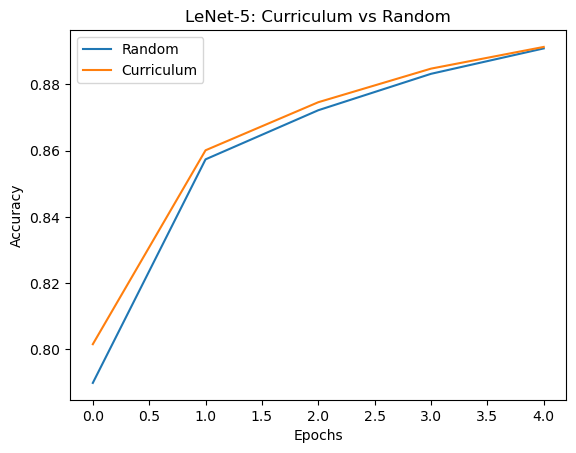

In [28]:
plt.plot(history_lenet.history['accuracy'], label='Random')
plt.plot(lenet_curr.history.history['accuracy'], label='Curriculum')  
plt.title("LeNet-5: Curriculum vs Random")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## curriculum (orange) = learns faster at the start
## random (blue) = catches up later
## both end at ~89% accuracy

 plot accuracy learning curves for lenet-5

 compare random training vs curriculum training

 x-axis = epochs, y-axis = accuracy

 add legend to show which curve is which
 
 helps see if curriculum learning improves accuracy


## 8) KMNIST Experiments

In [ ]:

# Random LeNet on KMNIST
lenet_kmnist = build_lenet5()
history_lenet_kmnist = lenet_kmnist.fit(
    x_train_k, y_train_k, 
    validation_data=(x_test_k, y_test_k),
    epochs=5, batch_size=64
)

# Random ResNet on KMNIST
resnet_kmnist = build_resnet_mini()
history_resnet_kmnist = resnet_kmnist.fit(
    x_train_k, y_train_k,
    validation_data=(x_test_k, y_test_k),
    epochs=5, batch_size=64
)

# Curriculum for KMNIST (create curriculum order)
preds_k = lenet_kmnist.predict(x_test_k)
cm_k = confusion_matrix(y_test_k, np.argmax(preds_k, axis=1))
confusability_k = cm_k.sum(axis=1)
sorted_classes_k = np.argsort(confusability_k)

x_curr_k, y_curr_k = [], []
for c in sorted_classes_k:
    mask = (y_train_k == c)
    x_curr_k.append(x_train_k[mask])
    y_curr_k.append(y_train_k[mask])
x_curr_k = np.concatenate(x_curr_k)
y_curr_k = np.concatenate(y_curr_k)

# Curriculum LeNet on KMNIST
lenet_curr_k = build_lenet5()
history_lenet_curr_k = lenet_curr_k.fit(
    x_curr_k, y_curr_k,
    validation_data=(x_test_k, y_test_k),
    epochs=5, batch_size=64
)

# Curriculum ResNet on KMNIST
resnet_curr_k = build_resnet_mini()
history_resnet_curr_k = resnet_curr_k.fit(
    x_curr_k, y_curr_k,
    validation_data=(x_test_k, y_test_k),
    epochs=5, batch_size=64
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8621 - loss: 0.4574 - val_accuracy: 0.8500 - val_loss: 0.4882
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9446 - loss: 0.1846 - val_accuracy: 0.8796 - val_loss: 0.3909
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9627 - loss: 0.1261 - val_accuracy: 0.9045 - val_loss: 0.3309
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9711 - loss: 0.0953 - val_accuracy: 0.9111 - val_loss: 0.3104
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9772 - loss: 0.0759 - val_accuracy: 0.9090 - val_loss: 0.3284
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.6382 - loss: 1.3670 - val_accuracy: 0.6050 - val_loss: 1.3536
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.8216 - loss: 0.7076 - val_accuracy: 0.6090 - val_loss: 1.1754
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.8658 - loss: 0.5148 - val_accuracy: 0.68

c:\Users\zakih\anaconda3\envs\deep-learning-course-2025\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8655 - loss: 0.4458 - val_accuracy: 0.8513 - val_loss: 0.4860
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9473 - loss: 0.1764 - val_accuracy: 0.8838 - val_loss: 0.3949
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9639 - loss: 0.1200 - val_accuracy: 0.9050 - val_loss: 0.3327
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9723 - loss: 0.0904 - val_accuracy: 0.8986 - val_loss: 0.3625
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9783 - loss: 0.0716 - val_accuracy: 0.9216 - val_loss: 0.2895
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.6220 - loss: 1.3941 - val_accuracy: 0.5555 - val_loss: 1.3950
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.8246 - loss: 0.6902 - val_accuracy: 0.6728 - val_loss: 1.0757
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.8709 - loss: 0.4918 - val_accuracy: 0.6558 - val_l

## 9) F1-Score Analysis

In [ ]:

# Calculate F1 scores for Fashion-MNIST
f1_lenet_random = get_f1_score(lenet, x_test, y_test)
f1_lenet_curr = get_f1_score(lenet_curr, x_test, y_test)
f1_resnet_random = get_f1_score(resnet, x_test, y_test)
f1_resnet_curr = get_f1_score(resnet_curr, x_test, y_test)

print("Fashion-MNIST F1-Scores:")
print(f"LeNet Random: {f1_lenet_random:.3f}")
print(f"LeNet Curriculum: {f1_lenet_curr:.3f}")
print(f"ResNet Random: {f1_resnet_random:.3f}")
print(f"ResNet Curriculum: {f1_resnet_curr:.3f}")

# Calculate F1 scores for KMNIST
f1_lenet_k_random = get_f1_score(lenet_kmnist, x_test_k, y_test_k)
f1_lenet_k_curr = get_f1_score(lenet_curr_k, x_test_k, y_test_k)
f1_resnet_k_random = get_f1_score(resnet_kmnist, x_test_k, y_test_k)
f1_resnet_k_curr = get_f1_score(resnet_curr_k, x_test_k, y_test_k)

print("\nKMNIST F1-Scores:")
print(f"LeNet Random: {f1_lenet_k_random:.3f}")
print(f"LeNet Curriculum: {f1_lenet_k_curr:.3f}")
print(f"ResNet Random: {f1_resnet_k_random:.3f}")
print(f"ResNet Curriculum: {f1_resnet_k_curr:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Fashion-MNIST F1-Scores:
LeNet Random: 0.879
LeNet Curriculum: 0.877
ResNet Random: 0.823
ResNet Curriculum: 0.781
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

KMNIST F1-Scores:
LeNet Random: 0.909
LeNet Curriculum: 0.922
ResNet Random: 0.597
ResNet Curriculum: 0.667


## 10) Final Comparison

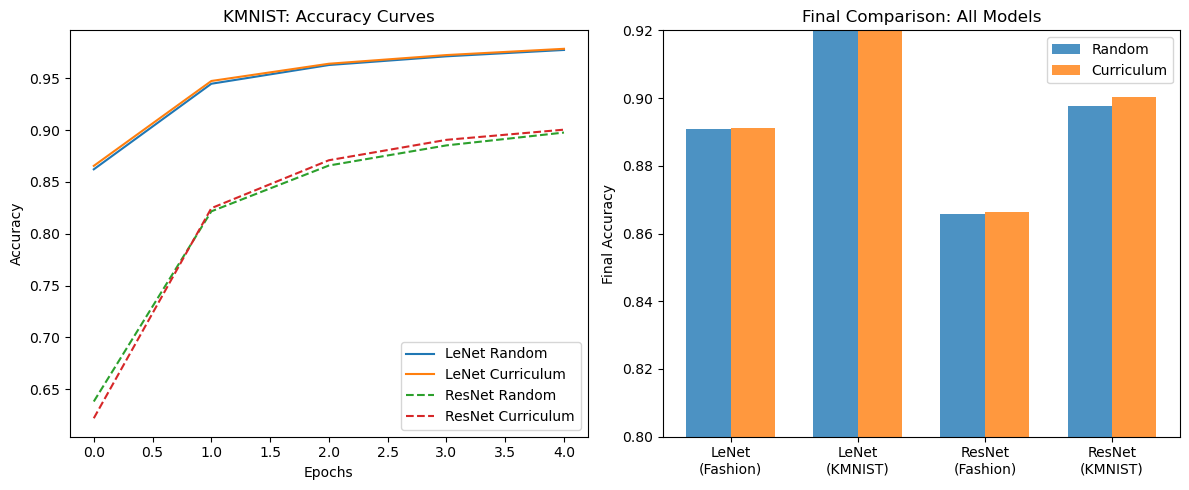

In [ ]:

# KMNIST learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_lenet_kmnist.history['accuracy'], label='LeNet Random')
plt.plot(history_lenet_curr_k.history['accuracy'], label='LeNet Curriculum')
plt.plot(history_resnet_kmnist.history['accuracy'], label='ResNet Random', linestyle='--')
plt.plot(history_resnet_curr_k.history['accuracy'], label='ResNet Curriculum', linestyle='--')
plt.title("KMNIST: Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
# Bar chart comparing final accuracies
models = ['LeNet\n(Fashion)', 'LeNet\n(KMNIST)', 'ResNet\n(Fashion)', 'ResNet\n(KMNIST)']
random_acc = [
    history_lenet.history['accuracy'][-1],
    history_lenet_kmnist.history['accuracy'][-1],
    history_resnet.history['accuracy'][-1],
    history_resnet_kmnist.history['accuracy'][-1]
]
curr_acc = [
    lenet_curr.history.history['accuracy'][-1],
    history_lenet_curr_k.history['accuracy'][-1],
    history_resnet_curr.history['accuracy'][-1],
    history_resnet_curr_k.history['accuracy'][-1]
]

x = np.arange(len(models))
width = 0.35
plt.bar(x - width/2, random_acc, width, label='Random', alpha=0.8)
plt.bar(x + width/2, curr_acc, width, label='Curriculum', alpha=0.8)
plt.ylabel('Final Accuracy')
plt.title('Final Comparison: All Models')
plt.xticks(x, models)
plt.legend()
plt.ylim([0.8, 0.92])

plt.tight_layout()
plt.show()